In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xml.etree.ElementTree as ET
import os,glob,sys
import pylheV
import scipy as sc
from tabulate import tabulate

sns.set() #Set style
sns.set_style('ticks',{'font.family':'serif', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
sns.set_palette(sns.color_palette("Paired"))

In [2]:
particlesDict = {}

In [3]:
with open("particles.xml") as f:
    xmlStr = f.read()
    xmlStr = "<root>\n" + xmlStr[:] + "</root>" 
root = ET.fromstring(xmlStr)

In [4]:
for particle in root:
    particleData  = particle.attrib
    pid = int(particleData['id'])
    particlesDict[pid] = {}
    for attr,val in particle.attrib.items():
        try:
            particlesDict[pid][attr] = eval(val) #Try to evaluate attribute
        except:
            particlesDict[pid][attr] = val

In [5]:
def getKey(my_value,d):    
    return next(key for key, value in d.items() if value == my_value)

In [6]:
def event_selector(nmin = 0, nmax = 1e5, dictionary = {}):
    eventDict = {}
    for key in dictionary:
        if dictionary[key] <= nmax and dictionary[key] >= nmin:
            eventDict[key] = dictionary[key]
        
    return eventDict

In [7]:
#No sort
def dictName1(file_name):
    
    eventDict = {}
    for n,e in enumerate(pylheV.readLHE(file_name)):
        f_ptc = ''
        for ptc in e.particles:
            if ptc.status > 0:
                if ptc.id > 0:
                    f_ptc = f_ptc + particlesDict[ptc.id]['name']
                else:
                    f_ptc = f_ptc + particlesDict[abs(ptc.id)]['antiName']
        if (eventDict.get(f_ptc)) == None:
            eventDict[f_ptc] = 1       
        else:
            eventDict[f_ptc] +=1
    
    return eventDict

In [8]:
def cleaner(f_ptc):
    f_ptc = np.sort(f_ptc)
    final = [f_ptc[0]]
    count = [1]
    j = 0
    for i in range(len(f_ptc)-1):
        if f_ptc[i+1] != f_ptc[i]:
            final.append(f_ptc[i+1])
            count.append(1)
            j+=1
        else:
            count[j] += 1
        
            
    return final, count
            
            


In [9]:
#Neutrinos in the output are given by adding or removing 'and abs(ptc.id) != 12 and abs(ptc.id) != 14 and abs(ptc.id) != 16' after ptc.status > 0
def dictName(file_name):
    
    eventDict = {}
    for n,e in enumerate(pylheV.readLHE(file_name)):
        f_ptc = []
        for ptc in e.particles:
            if ptc.status > 0:
                f_ptc.append(ptc.id)
   
        f_ptc = np.sort(f_ptc)
        f_ptc, count = cleaner(f_ptc)
        final = ''
        for i,f in enumerate(f_ptc):
            if f > 0:
                if count[i] == 1:
                    final = final + particlesDict[f]['name']
                else:
                    final = final + str(count[i]) +  particlesDict[f]['name']
            else:
                if count[i] == 1:
                    final = final + particlesDict[abs(f)]['antiName']
                else:
                    final = final + str(count[i]) +  particlesDict[abs(f)]['antiName']
                
        if (eventDict.get(final)) == None:
            eventDict[final] = 1       
        else:
            eventDict[final] +=1
    
    return eventDict

In [10]:
def dictID(file_name):
    
    eventDict = {}
    
    for n,e in enumerate(pylheV.readLHE(file_name)):
        f_ptc = []
        for ptc in e.particles:
            if ptc.status > 0:
                f_ptc.append(ptc.id)
   
        f_ptc = np.sort(f_ptc)
        f_ptc = tuple(f_ptc)
        
        if f_ptc in eventDict:
            eventDict[f_ptc] += 1
        else:
            eventDict[f_ptc] = 1
        
    
    return eventDict

In [11]:
def final_state(eDict,fstate):
    fstate_frac = np.zeros(len(eDict))
    for i,dicti in enumerate(eDict):
        fstate_frac[i] = dicti.get(fstate,0)
        fstate_frac[i] = fstate_frac[i]/100000
    return fstate_frac

In [12]:
fName = ['input_1dot5GeV.lhe','input_3GeV.lhe','input_3dot25GeV.lhe','input_3dot5GeV.lhe','input_3dot75GeV.lhe','input_4GeV.lhe','input_4dot5GeV.lhe','input_6GeV.lhe','input_7dot5GeV.lhe','input_9GeV.lhe', 'input_9dot25GeV.lhe','input_9dot4GeV.lhe','input_9dot7GeV.lhe','input_10dot5GeV.lhe','input_12GeV.lhe','input_13dot5GeV.lhe', 'input_15GeV.lhe']
eDict = []
for file in fName:
    eDict.append(dictName(file))

energy = [1.5,3,3.25,3.5,3.75,4,4.5,6,7.5,9,9.25,9.4,9.7,10.5,12,13.5,15]
    

In [22]:
print(dictName('input_9dot7GeV.lhe'))

{'$e^+$$e^-$': 97423, '2$\\gamma$': 1365, '$\\mu^+$$\\mu^-$': 219, '$\\bar{u}$u': 283, '$\\tau^+$$\\tau^-$': 236, '$\\bar{d}$d': 68, '$\\bar{s}$s': 85, '$\\bar{c}$c': 287, '$\\bar{b}$b': 34}


In [50]:
print(eDict[0])
print(eDict[10])
print(eDict[])

{'$e^+$$e^-$': 98363, '2$\\gamma$': 1403, '$\\mu^+$$\\mu^-$': 234}
{'$e^+$$e^-$': 97302, '2$\\gamma$': 1386, '$\\mu^+$$\\mu^-$': 225, '$\\tau^+$$\\tau^-$': 264, '$\\bar{u}$u': 313, '$\\bar{c}$c': 285, '$\\bar{s}$s': 76, '$\\bar{d}$d': 79, '$\\bar{b}$b': 70}


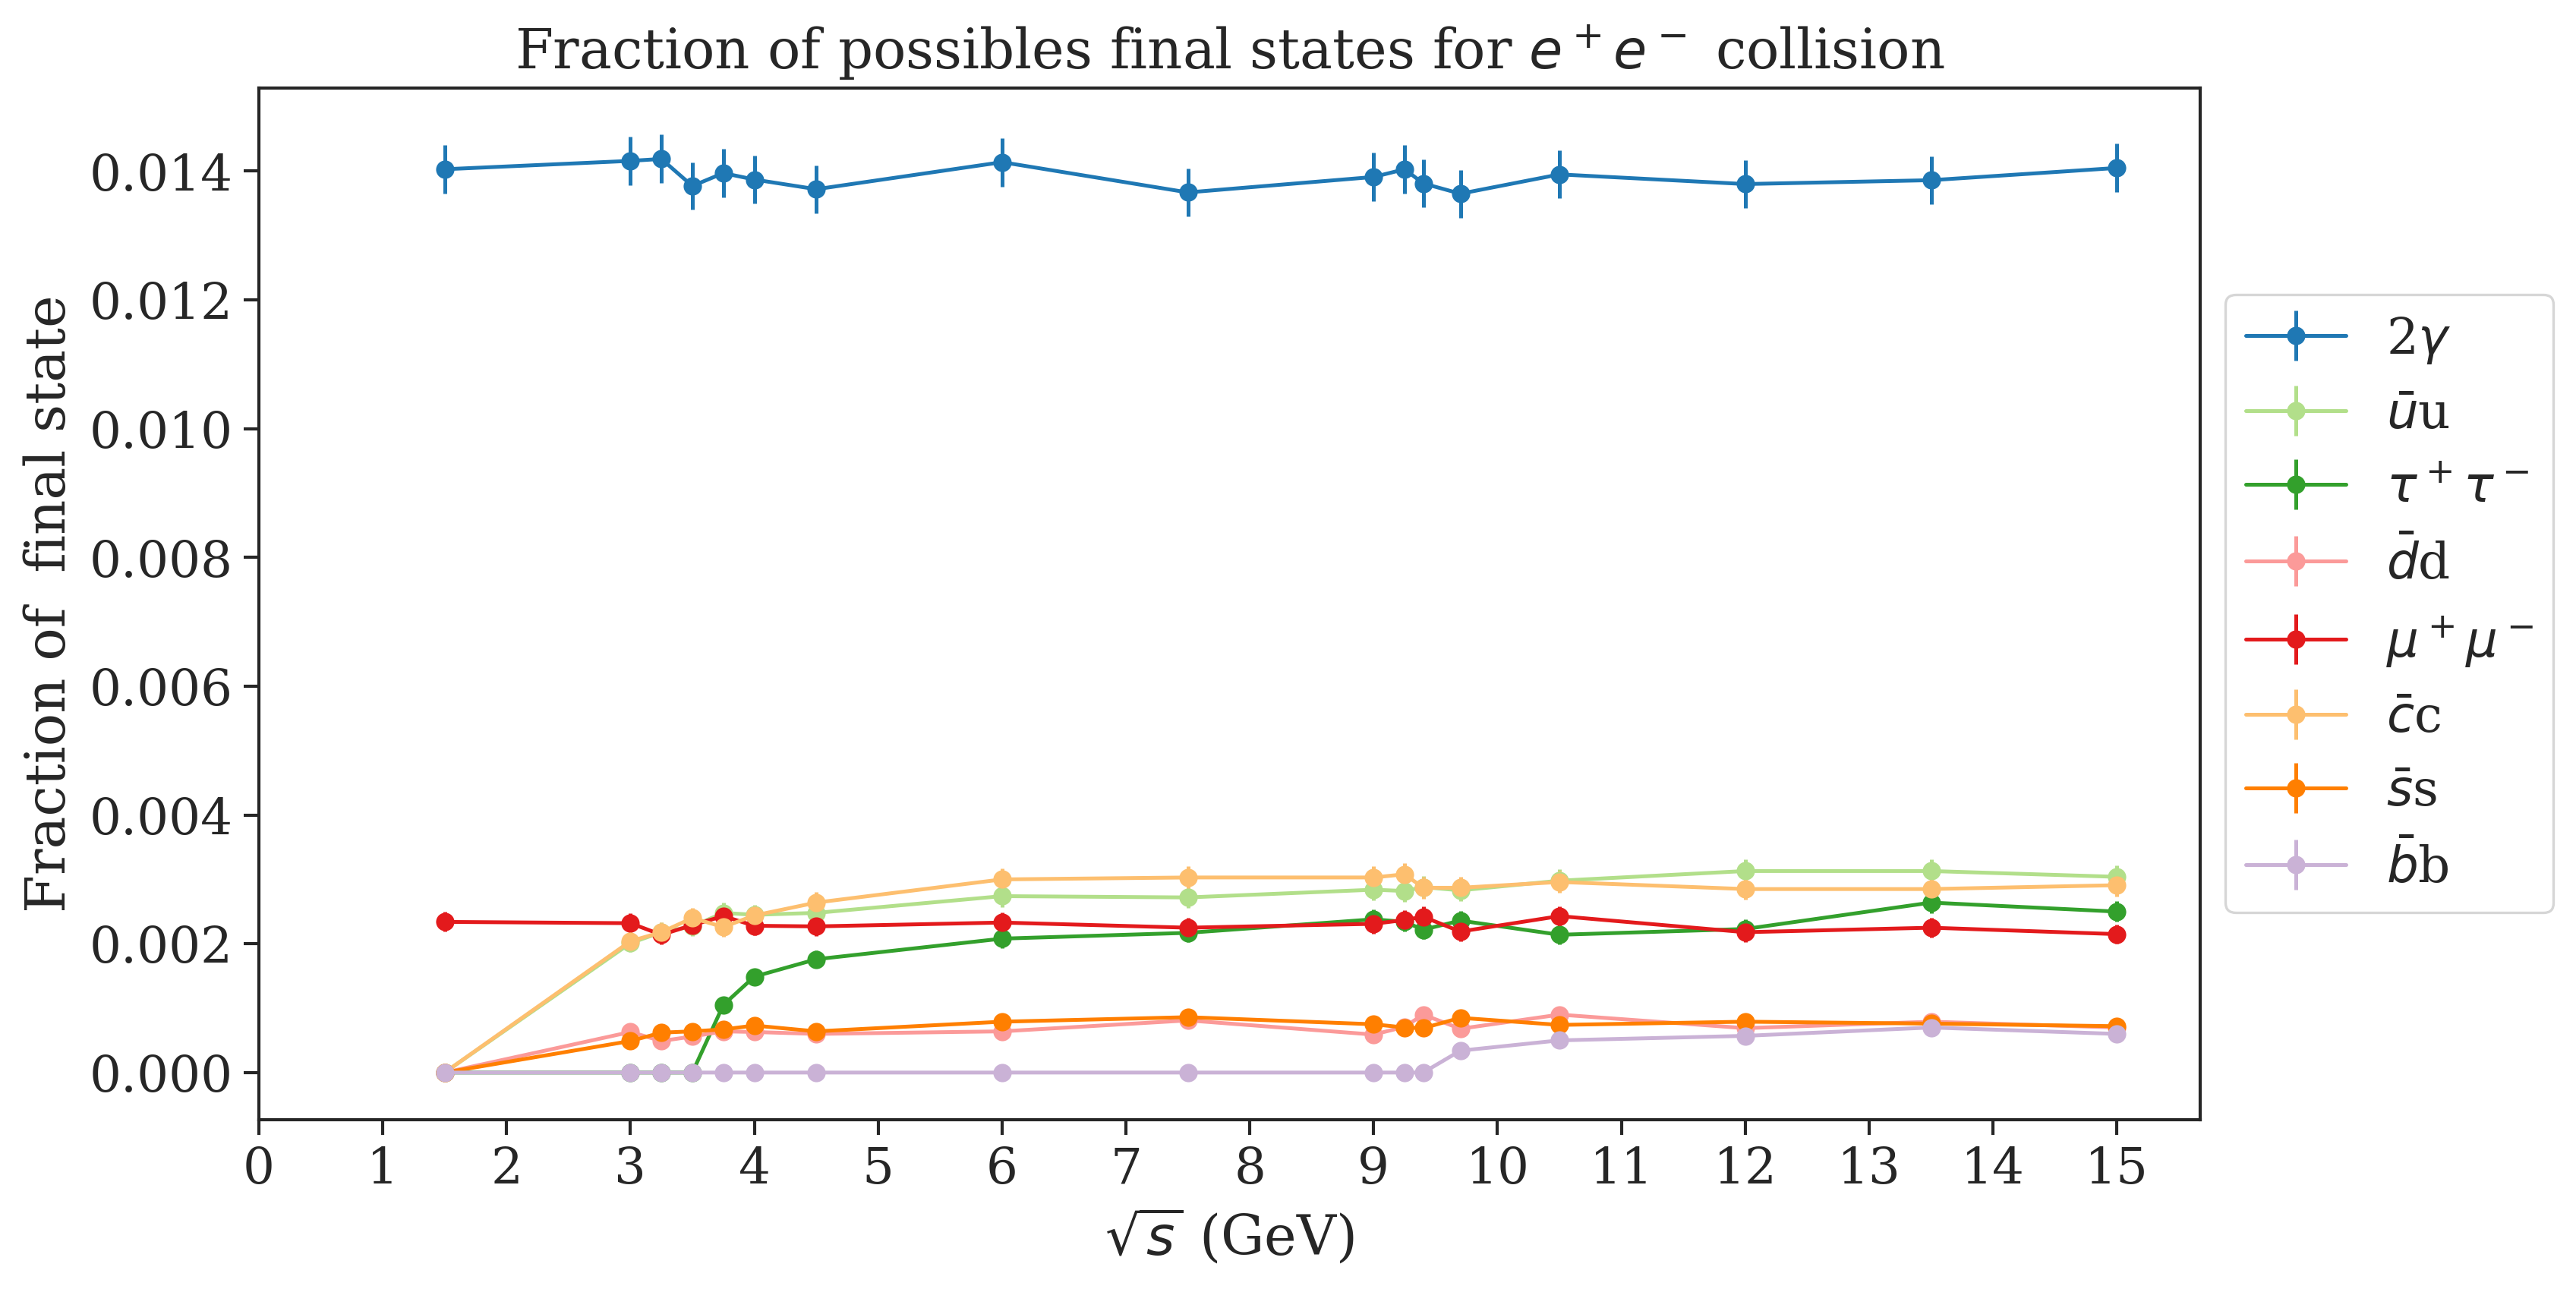

In [87]:

fig = plt.figure(figsize = [11,6], dpi = 300)

color = sns.color_palette("Paired",len(eDict[len(eDict)-1]))


for i,key in enumerate(eDict[len(eDict)-1]):
    
    if key == '2$\\gamma$':
        f_state = np.array(final_state(eDict,key))
        plt.errorbar(x = energy,y = f_state, xerr = None, yerr = np.sqrt(f_state/1e5), color = color[i], marker ='o', label = key)
        
              
    elif '$\\mu^+$$\\mu^-$' == key:
        f_state = np.array(final_state(eDict,key))
        plt.errorbar(x = energy,y = f_state, xerr = None, yerr = np.sqrt(f_state/1e5), color = color[i], marker ='o', label = key)
    
    elif key != '$e^+$$e^-$' :
        f_state = np.array(final_state(eDict,key))
        plt.errorbar(x = energy,y = f_state, xerr = None, yerr = np.sqrt(f_state/1e5), color = color[i], marker ='o', label = key)
        
           
plt.title(r'Fraction of possibles final states for $e^+e^-$ collision')
plt.xlabel(r'$\sqrt{s}$ (GeV)')
plt.ylabel(r'Fraction of  final state')
plt.xticks(range(0,16))
plt.legend(bbox_to_anchor=(1, 0.5), loc='center left')
plt.show()
    
    

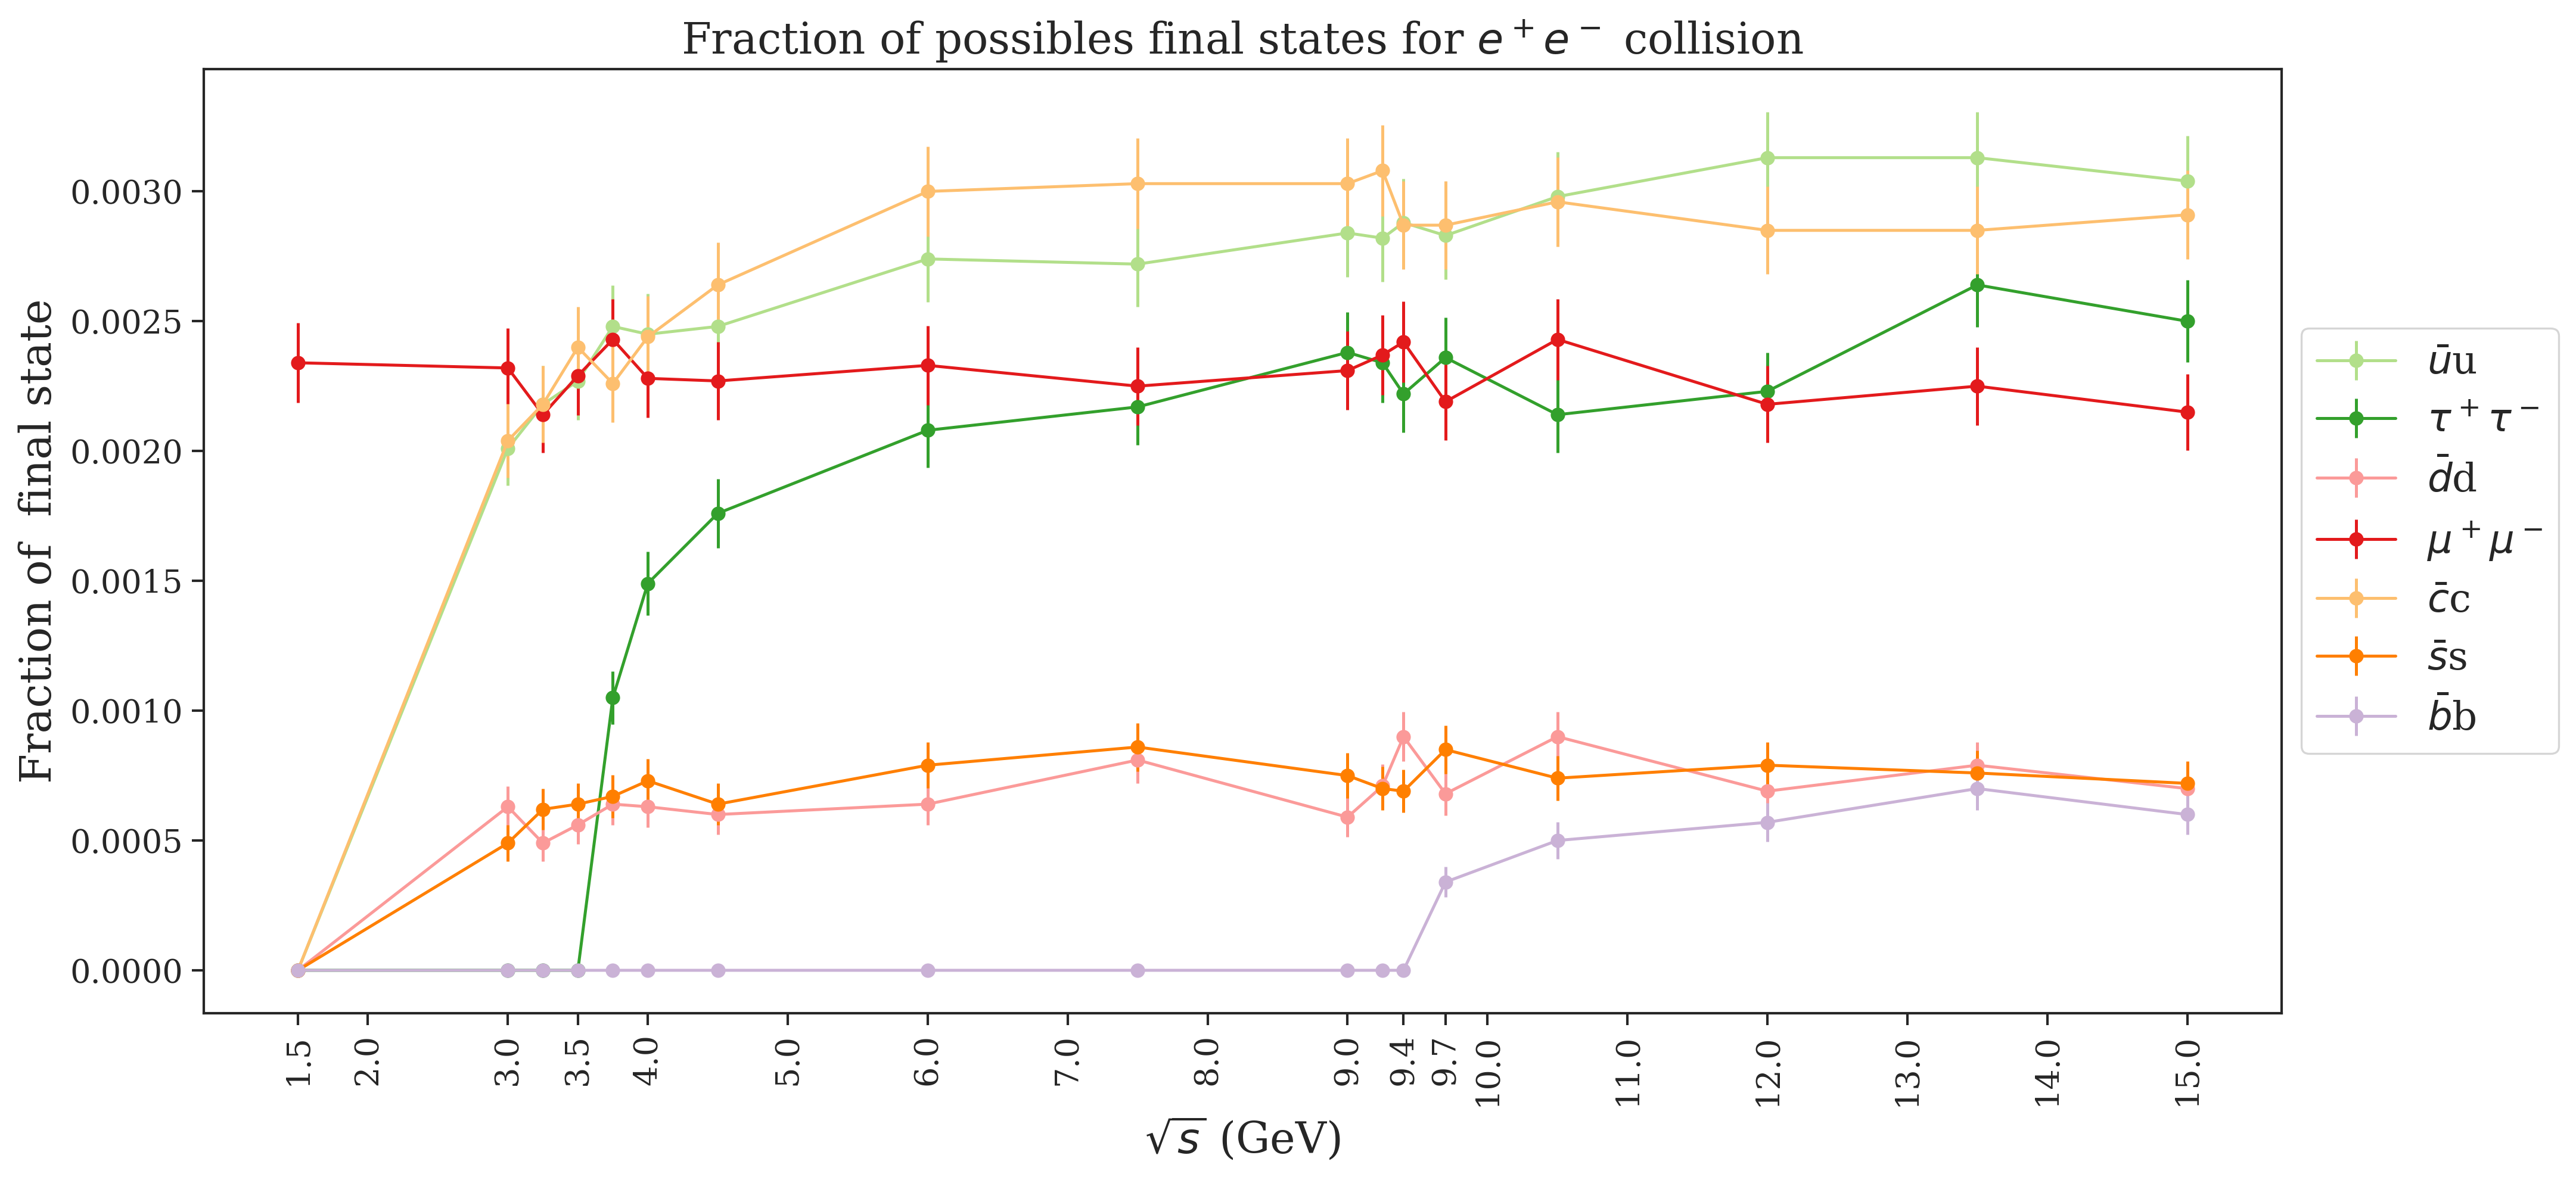

In [13]:

fig = plt.figure(figsize = [15,7], dpi = 300)

color = sns.color_palette("Paired",len(eDict[len(eDict)-1]))


for i,key in enumerate(eDict[len(eDict)-1]):
    
    if '$\\mu^+$$\\mu^-$' == key:
        f_state = np.array(final_state(eDict,key))
        plt.errorbar(x = energy,y = f_state, xerr = None, yerr = np.sqrt(f_state/1e5), color = color[i], marker ='o', label = key)
    
    elif key != '$e^+$$e^-$' and key !='2$\\gamma$':
        f_state = np.array(final_state(eDict,key))
        plt.errorbar(x = energy,y = f_state, xerr = None, yerr = np.sqrt(f_state/1e5), color = color[i], marker ='o', label = key)
        

plt.title(r'Fraction of possibles final states for $e^+e^-$ collision')
plt.xlabel(r'$\sqrt{s}$ (GeV)')
plt.ylabel(r'Fraction of  final state')
#plt.xticks(range(0,16))
plt.xticks([1.5,2,3,3.5,4,5,6,7,8,9,9.4,9.7,10,11,12,13,14,15], rotation = 90, fontsize = 13)
plt.yticks(fontsize = 13)
plt.legend(bbox_to_anchor=(1, 0.5), loc='center left')
plt.savefig('Particlesfractions.pdf', dpi = 300)
plt.show()
    

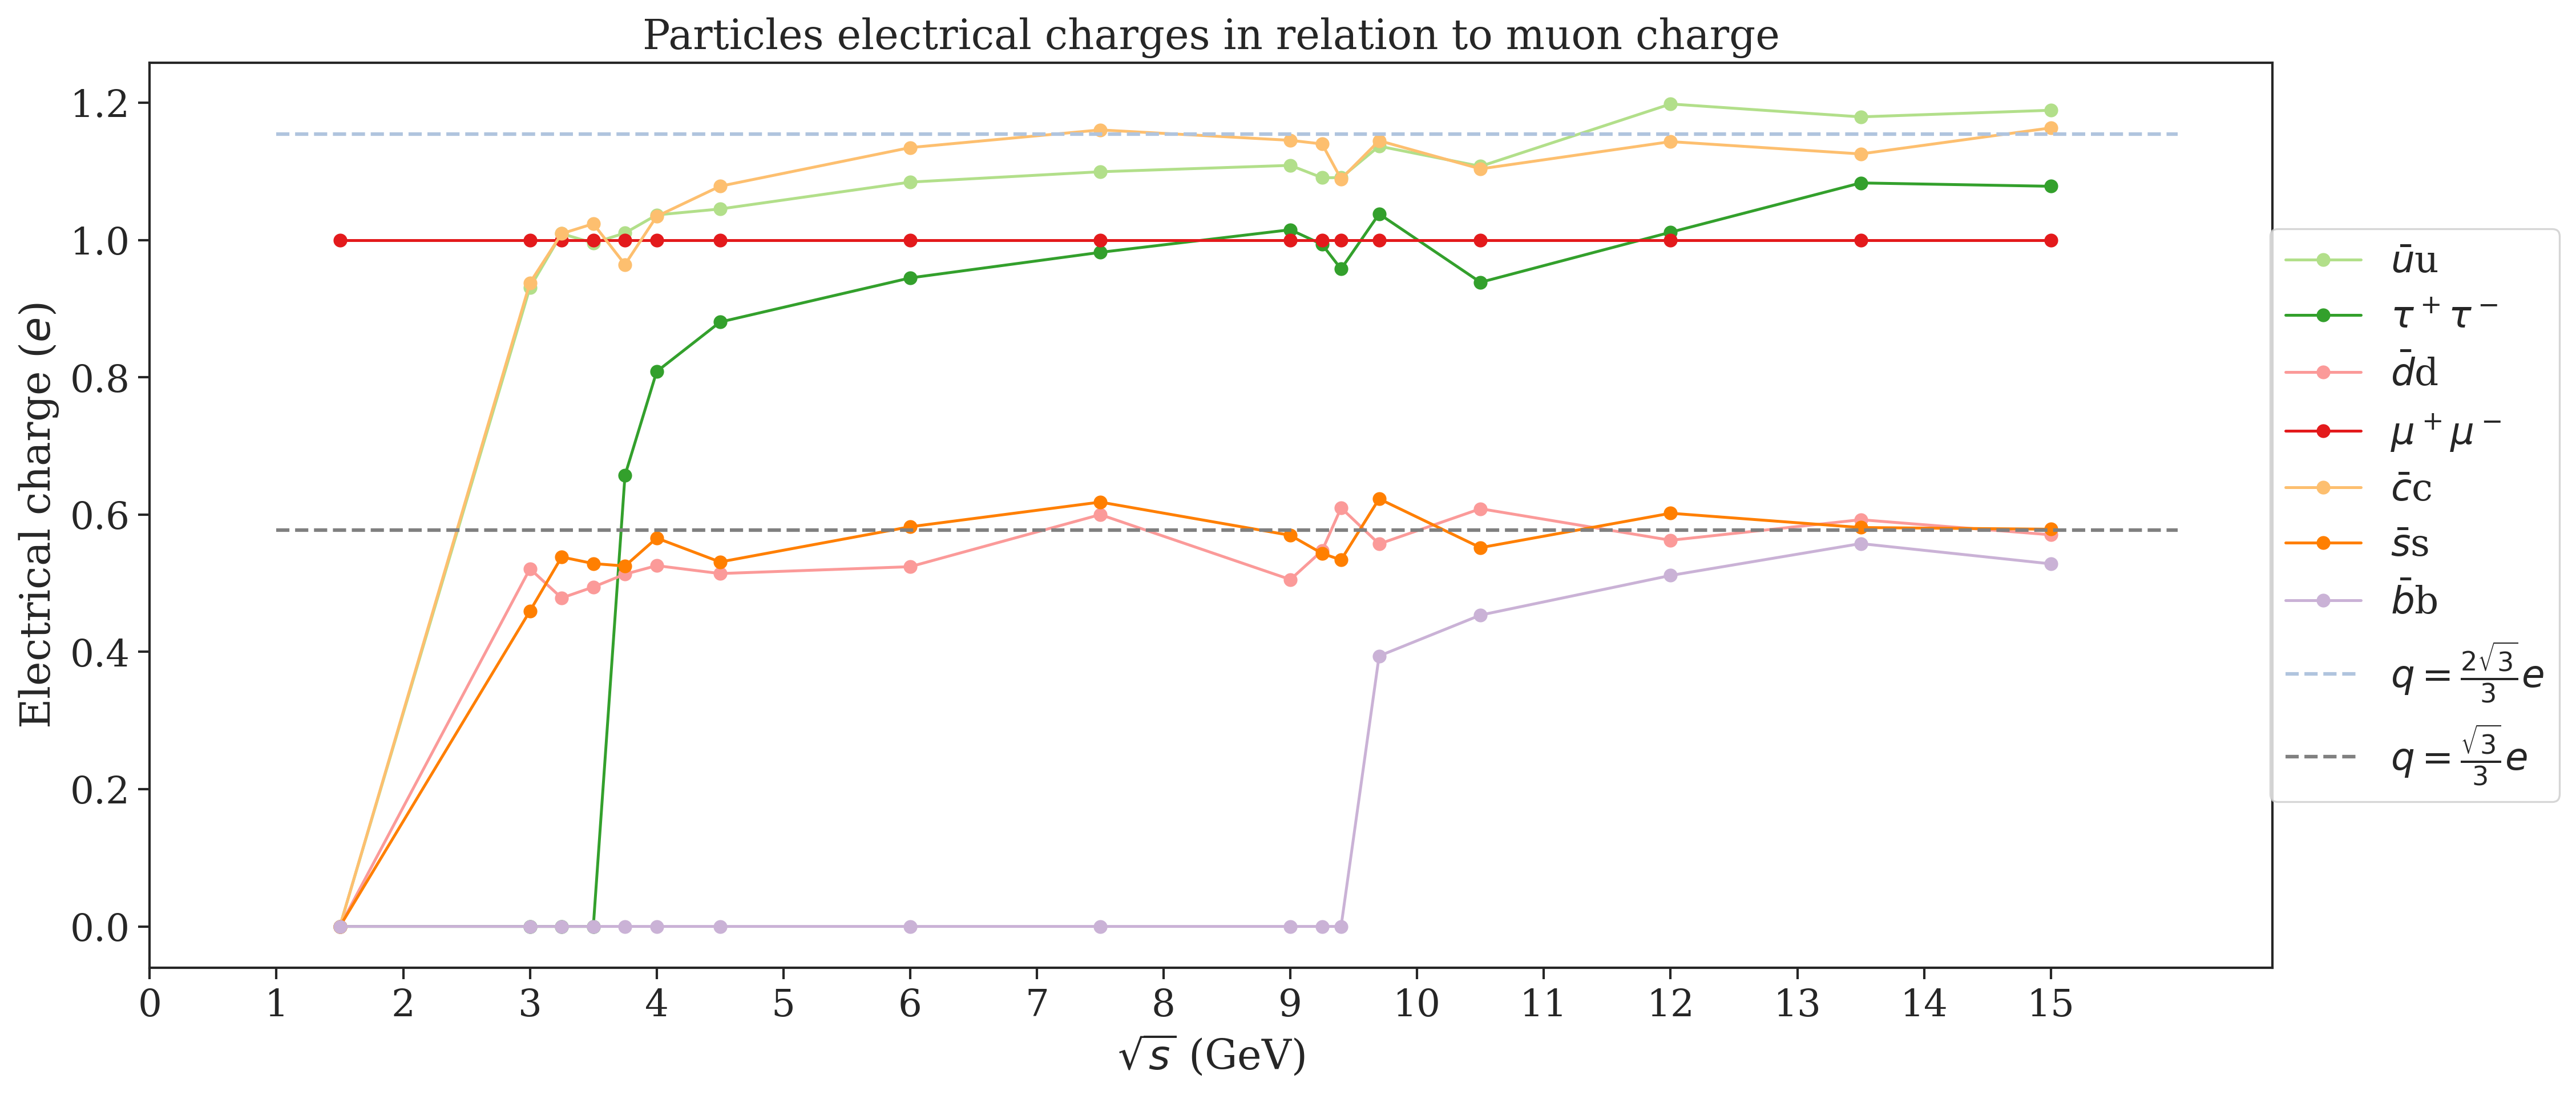

In [13]:
fig = plt.figure(figsize = [16,7], dpi = 300)

color = sns.color_palette("Paired",len(eDict[len(eDict)-1]))

muon_frac = np.array(final_state(eDict,'$\\mu^+$$\\mu^-$'))
for i,key in enumerate(eDict[len(eDict)-1]):
    if key != '$e^+$$e^-$' and key !='2$\\gamma$':
        f_state = np.array(final_state(eDict,key))
        plt.plot(energy, np.sqrt(np.divide(f_state,muon_frac)), color = color[i], marker ='o', label = key)
        
plt.plot([1,16],[2/np.sqrt(3),2/np.sqrt(3)], ls = '--', color = 'lightsteelblue', lw = 1.5, label = r'$ q = \frac{2\sqrt{3}}{3}e$')
plt.plot([1,16],[1/np.sqrt(3),1/np.sqrt(3)], ls = '--', color = 'grey', lw = 1.5, label = r'$ q = \frac{\sqrt{3}}{3}e$')
plt.title(r'Particles electrical charges in relation to muon charge')
plt.xlabel(r'$\sqrt{s}$ (GeV)')
plt.ylabel(r'Electrical charge ($e$)')
plt.xticks(range(0,16))
plt.legend(bbox_to_anchor=(0.99, 0.5), loc='center left')
plt.savefig('ParticlesCharge.pdf', dpi = 300)
plt.show()

In [60]:
charges_Dict = {}
charge = {}
table = [['Particle', 'Charge', 'Error']]

muon_frac = np.array(final_state(eDict,'$\\mu^+$$\\mu^-$'))[13:]
for i,key in enumerate(eDict[len(eDict)-1]):
    if key != '$e^+$$e^-$' and key !='2$\\gamma$' and key !='$\\mu^+$$\\mu^-$' and key !='$\\tau^+$$\\tau^-$':
        f_state = np.array(final_state(eDict,key)[13:])
        charges_Dict[key] = np.sqrt(np.divide(f_state/3,muon_frac))
    elif key != '$e^+$$e^-$' and key !='2$\\gamma$':
        f_state = np.array(final_state(eDict,key)[13:])
        charges_Dict[key] = np.sqrt(np.divide(f_state,muon_frac))

for keys in charges_Dict:
    
    table = table + [[keys, np.around(np.mean(charges_Dict[keys]),decimals = 2),np.around(np.std(charges_Dict[keys])/np.sqrt(3), decimals = 2)]]
    charge[keys] = [np.mean(charges_Dict[keys]),np.std(charges_Dict[keys])/np.sqrt(3)]
        

In [61]:
print(tabulate(table,headers = 'firstrow', tablefmt = 'fancy_grid'))

╒══════════════════╤══════════╤═════════╕
│ Particle         │   Charge │   Error │
╞══════════════════╪══════════╪═════════╡
│ $\bar{u}$u       │     0.67 │    0.01 │
├──────────────────┼──────────┼─────────┤
│ $\tau^+$$\tau^-$ │     1.03 │    0.03 │
├──────────────────┼──────────┼─────────┤
│ $\bar{d}$d       │     0.34 │    0.01 │
├──────────────────┼──────────┼─────────┤
│ $\mu^+$$\mu^-$   │     1    │    0    │
├──────────────────┼──────────┼─────────┤
│ $\bar{c}$c       │     0.65 │    0.01 │
├──────────────────┼──────────┼─────────┤
│ $\bar{s}$s       │     0.33 │    0.01 │
├──────────────────┼──────────┼─────────┤
│ $\bar{b}$b       │     0.3  │    0.01 │
╘══════════════════╧══════════╧═════════╛
